## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [35]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features=None, random_state=None, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, min_impurity_split=None, 
                             class_weight=None, presort=False)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01341996 0.         0.06979581 0.91678423]


In [6]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [36]:
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    out_file="tree.dot")

In [37]:
!dot -Tpng tree.dot -o tree.png

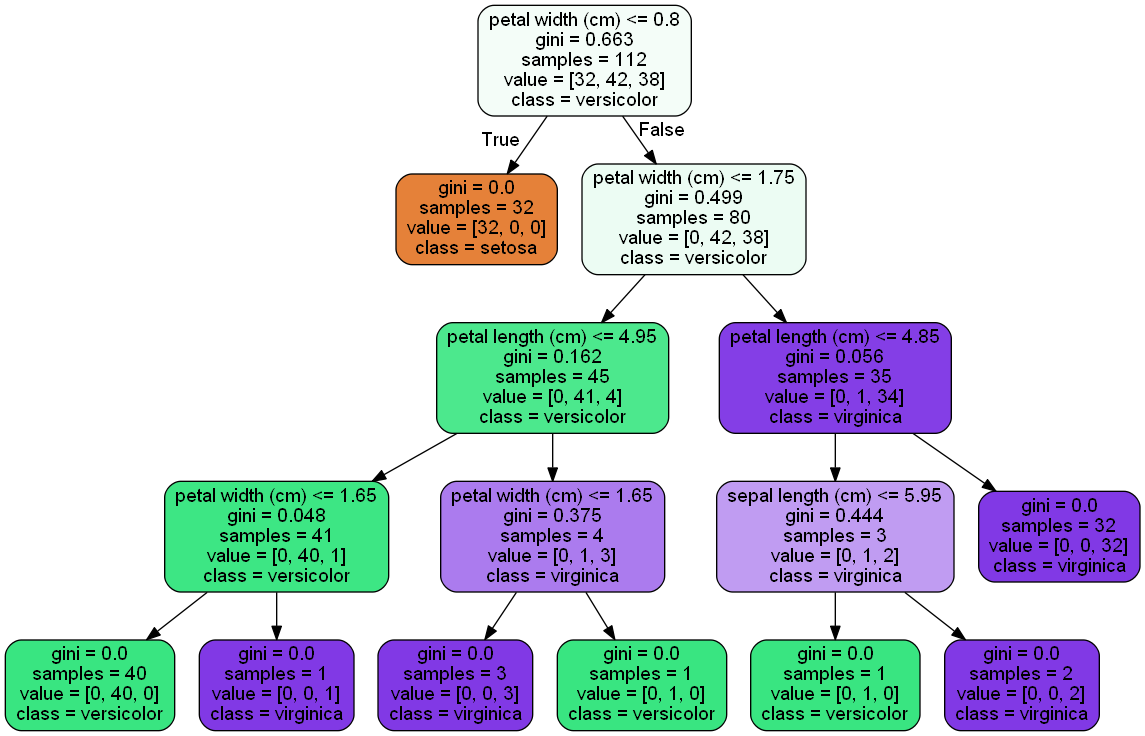

In [38]:
from IPython.display import Image
Image(filename = 'tree.png', width=700)